In [ ]:
import pandas as pd
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

## read dataset

In [ ]:
df = pd.read_csv('/content/implicit_hate_v1_stg1_posts.tsv', sep='\t')
df.head(3)

,post,class
0,""" : jewish harvard professor noel ignatiev w...",implicit_hate
1,b.higher education is a part of european cult...,not_hate
2,"has a problem with "" the whites "" "" and "" "" ...",not_hate


In [ ]:
df.shape

(21480, 2)

In [ ]:
print(df['class'].value_counts())
df['class'] = df['class'].replace('implicit_hate', 'hate')
df['class'] = df['class'].replace('explicit_hate', 'hate')
print(df['class'].value_counts())

X = df['post']
y = df['class']
classes = list(df['class'].unique())

class
not_hate         13291
implicit_hate     7100
explicit_hate     1089
Name: count, dtype: int64
class
not_hate    13291
hate         8189
Name: count, dtype: int64


## Binary Classification (baseline)

In [ ]:
# Load pre-trained BERT model
model_name = 'bert-base-nli-mean-tokens'
model = SentenceTransformer(model_name)

# Encode text using pre-trained BERT model
encoded_text = model.encode(X.tolist())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_text, df['class'], test_size=0.2, random_state=42)

Accuracy: 0.7325418994413407 

              precision    recall  f1-score   support

        hate       0.67      0.57      0.62      1622
    not_hate       0.76      0.83      0.79      2674

    accuracy                           0.73      4296
   macro avg       0.72      0.70      0.71      4296
weighted avg       0.73      0.73      0.73      4296



<Axes: >

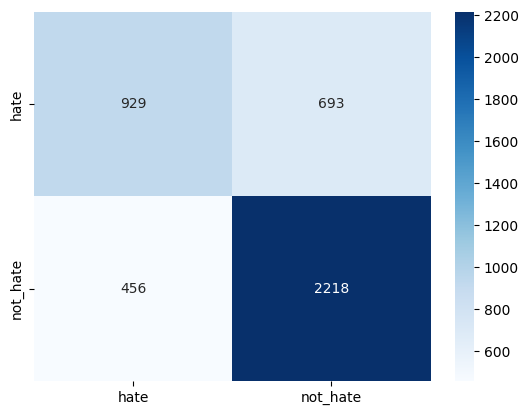

In [ ]:
# Define MLP classifier with 6 output classes
classifier = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=1000)

# Train the classifier on the encoded text
classifier.fit(X_train, y_train)

# Predict the labels for the encoded text
y_pred = classifier.predict(X_test)

# Calculate accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy} \n")

# Calculate classification report and confusion matrix
target_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6']
print(classification_report(y_test, y_pred, target_names=classes))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='d')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Extract metrics
def calculate_metrics(cm):
    # Number of classes
    num_classes = cm.shape[0]

    # Initialize lists to store metrics for each class
    accuracy = []


    # Calculate metrics for each class
    for i in range(num_classes):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        acc = (TP + TN) / (TP + TN + FP + FN) * 100
        prec = TP / (TP + FP) * 100 if (TP + FP) != 0 else 0
        rec = TP / (TP + FN) * 100 if (TP + FN) != 0 else 0
        f1 = 2 * TP / (2 * TP + FP + FN) * 100 if (2 * TP + FP + FN) != 0 else 0

        accuracy.append(acc)


    return accuracy, precision, recall, f1_score

# Calculate metrics
accuracy, precision, recall, f1_score = calculate_metrics(cm)



In [ ]:
print(accuracy)

[73.25418994413407, 73.25418994413407]


In [ ]:
print( precision, recall, f1_score)

[65.67534076827756, 79.0454884414616] [65.35141800246609, 79.28197456993269] [65.51297898640297, 79.16355489171023]


In [ ]:

precision = [p / 100 for p in precision]
recall = [r / 100 for r in recall]
f1_score = [f / 100 for f in f1_score]

print("Precision (Probabilities):", precision)
print("Recall (Probabilities):", recall)
print("F1-Score (Probabilities):", f1_score)


Precision (Probabilities): [0.6567534076827757, 0.790454884414616]
Recall (Probabilities): [0.6535141800246609, 0.7928197456993269]
F1-Score (Probabilities): [0.6551297898640297, 0.7916355489171023]


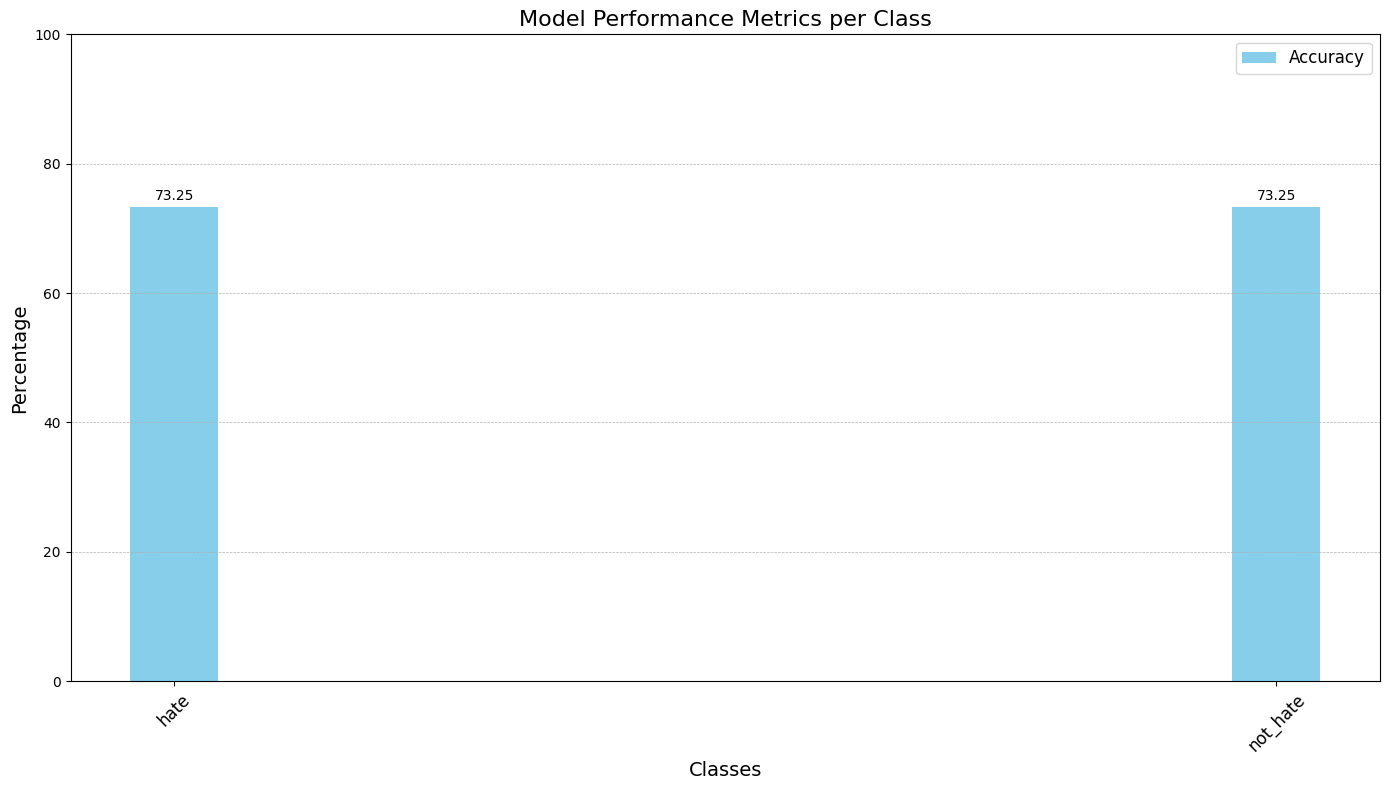

In [ ]:

plt.figure(figsize=(14, 8))


bar1 = plt.bar(x , accuracy, 0.08, label='Accuracy', color='skyblue')


plt.xlabel('Classes', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Model Performance Metrics per Class', fontsize=16)
plt.xticks(x, classes, rotation=45, fontsize=12)
plt.ylim(0, 100)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

autolabel(bar1)


plt.tight_layout()
plt.show()

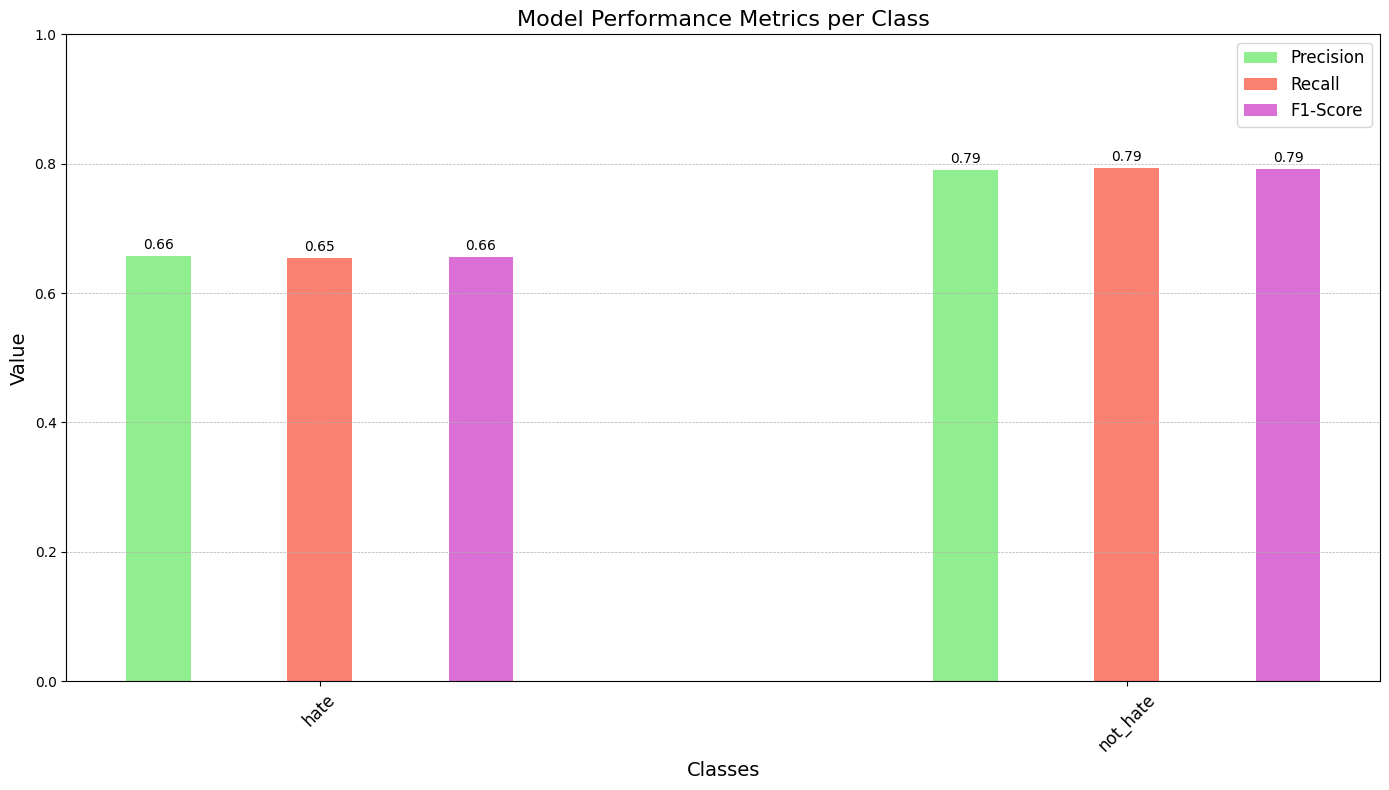

In [ ]:


# Plot precision, recall, and F1-score in the range 0-1
x = np.arange(len(classes))
width = 0.2

plt.figure(figsize=(14, 8))

bar1 = plt.bar(x - width, precision, 0.08, label='Precision', color='lightgreen')
bar2 = plt.bar(x, recall, 0.08, label='Recall', color='salmon')
bar3 = plt.bar(x + width, f1_score, 0.08, label='F1-Score', color='orchid')

plt.xlabel('Classes', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Model Performance Metrics per Class', fontsize=16)
plt.xticks(x, classes, rotation=45, fontsize=12)
plt.ylim(0, 1)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.tight_layout()
plt.show()


## Binary Classification (baseline + BK)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def extract_background_knowledge(tweet_text):
    # Tokenize the tweet text
    tokens = word_tokenize(tweet_text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Extract background knowledge from tokens
    background_knowledge = set()
    for token in tokens:
        if len(token) > 3:
            background_knowledge.add(token)

    background_knowledge = list(background_knowledge)
    return ' '.join(background_knowledge)

In [ ]:
text_with_BK = [x + extract_background_knowledge(x) for x in X]

# Load pre-trained BERT model
model_name = 'bert-base-nli-mean-tokens'
model = SentenceTransformer(model_name)

# Encode text using pre-trained BERT model
encoded_text = model.encode(text_with_BK)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_text, df['class'], test_size=0.2, random_state=42)

Accuracy: 0.707635009310987 

              precision    recall  f1-score   support

        hate       0.61      0.63      0.62      1622
    not_hate       0.77      0.76      0.76      2674

    accuracy                           0.71      4296
   macro avg       0.69      0.69      0.69      4296
weighted avg       0.71      0.71      0.71      4296



<Axes: >

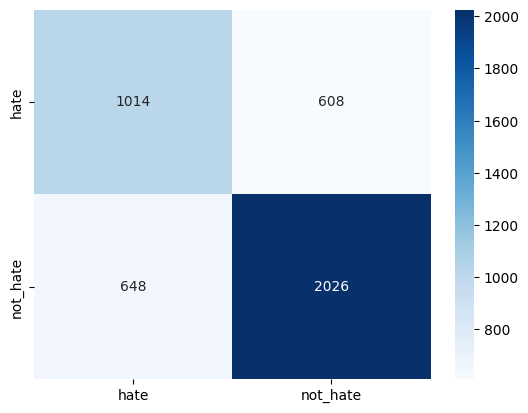

In [ ]:
# Define MLP classifier with 6 output classes
classifier = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=1000)

# Train the classifier on the encoded text
classifier.fit(X_train, y_train)

# Predict the labels for the encoded text
y_pred = classifier.predict(X_test)

# Calculate accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy} \n")

# Calculate classification report and confusion matrix
target_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6']
print(classification_report(y_test, y_pred, target_names=classes))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='d')

In [ ]:



# Calculate precision, recall, and F1-score
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)


Precision: [0.6101083  0.76917236]
Recall: [0.62515413 0.75766642]
F1-Score: [0.61753959 0.76337604]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Extract metrics
def calculate_metrics(cm):
    # Number of classes
    num_classes = cm.shape[0]

    # Initialize lists to store metrics for each class
    accuracy = []


    # Calculate metrics for each class
    for i in range(num_classes):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        acc = (TP + TN) / (TP + TN + FP + FN) * 100

        accuracy.append(acc)


    return accuracy

# Calculate metrics
accuracy = calculate_metrics(cm)



In [ ]:
print(accuracy, precision, recall, f1_score  )

[70.7635009310987, 70.7635009310987] [0.6101083  0.76917236] [0.62515413 0.75766642] [0.61753959 0.76337604]


In [ ]:


print("Precision (Probabilities):", precision)
print("Recall (Probabilities):", recall)
print("F1-Score (Probabilities):", f1_score)

Precision (Probabilities): [0.6101083  0.76917236]
Recall (Probabilities): [0.62515413 0.75766642]
F1-Score (Probabilities): [0.61753959 0.76337604]


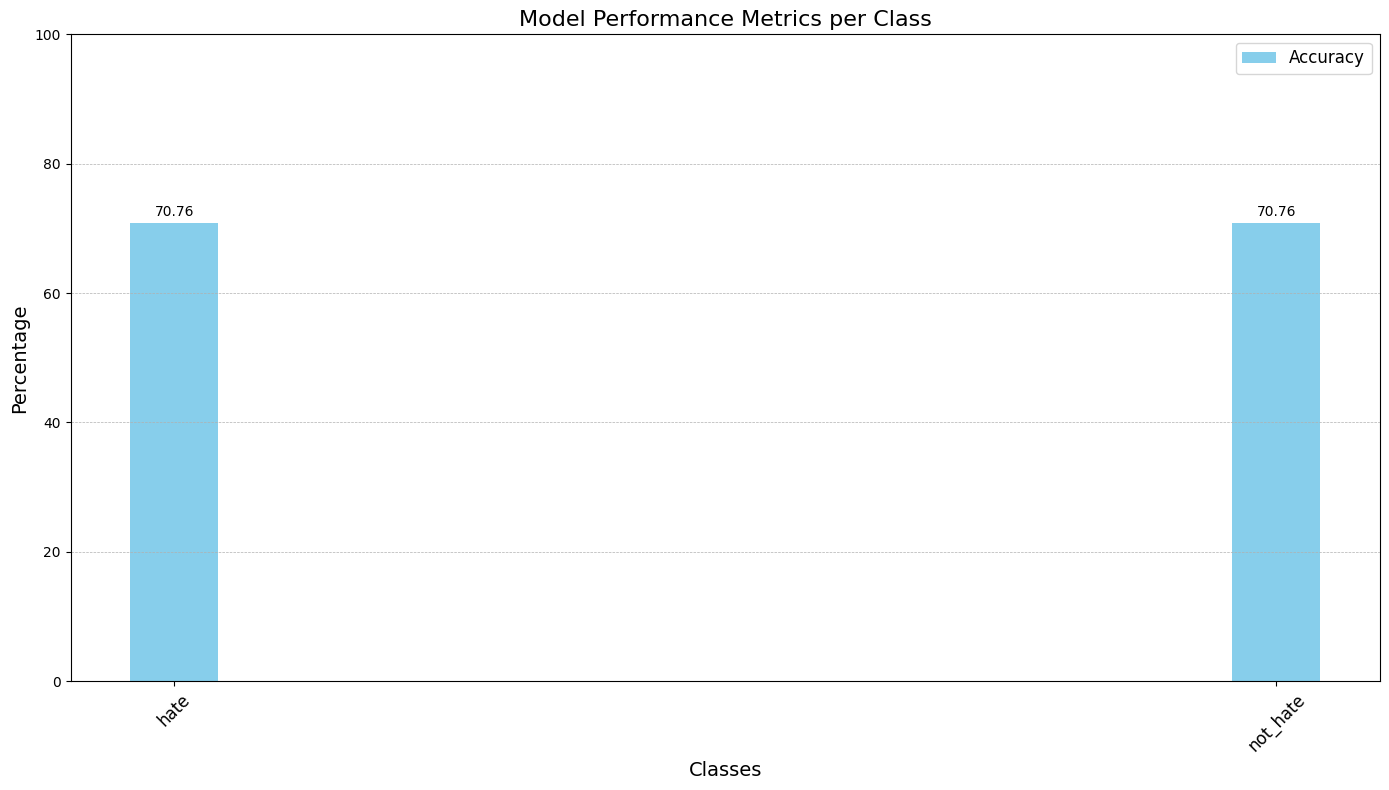

In [ ]:

plt.figure(figsize=(14, 8))


bar1 = plt.bar(x , accuracy, 0.08, label='Accuracy', color='skyblue')


plt.xlabel('Classes', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Model Performance Metrics per Class', fontsize=16)
plt.xticks(x, classes, rotation=45, fontsize=12)
plt.ylim(0, 100)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

autolabel(bar1)


plt.tight_layout()
plt.show()

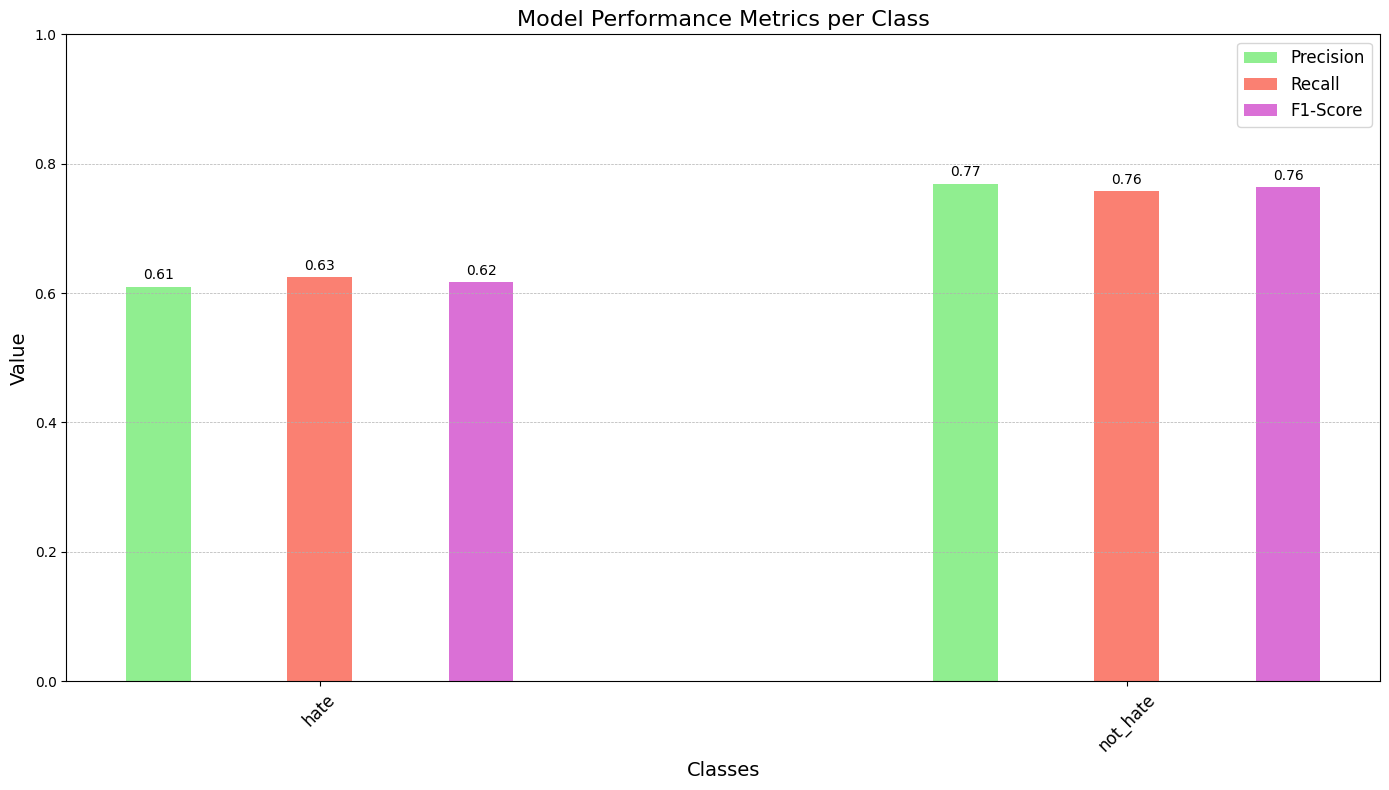

In [ ]:


plt.figure(figsize=(14, 8))

bar1 = plt.bar(x - width, precision, 0.08, label='Precision', color='lightgreen')
bar2 = plt.bar(x, recall, 0.08, label='Recall', color='salmon')
bar3 = plt.bar(x + width, f1_score, 0.08, label='F1-Score', color='orchid')

plt.xlabel('Classes', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Model Performance Metrics per Class', fontsize=16)
plt.xticks(x, classes, rotation=45, fontsize=12)
plt.ylim(0, 1)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.tight_layout()
plt.show()
